**Introducción**

*Descripción:*

Este conjunto de datos contiene información sobre diversas características de los Pokémon. Cada entrada en el conjunto de datos representa un Pokémon individual y contiene atributos relacionados con sus estadísticas, tipos, habilidades y más. El objetivo de este dataset es proporcionar información completa para análisis, estudios comparativos y aplicaciones relacionadas con el universo Pokémon.

*Objetivos:*

-Analizar los datos recopilados para identificar patrones en los diferentes tipos de pokemones.

-Probar la hipótesis de que "los tipo 'Grass' tienden a tener mas 'HP'

-Probar la hipótesis de que "los tipo 'Fire' tienden a tener mas 'Attack'

---------------------------------------------------------

El dataset con el que se trabajará refleja la pokedex hasta el índice 933, con las siguientes columnas:

**Name** (Nombre)

**Type 1** (Tipo predominante)

**Type 2**(Tipo adicional)

**Total** (Cantidad total del pokemon específico)

**HP** (Cantidad de vida)

**Attack** (Cantidad de ataque)

**Defense** (Cantidad de defensa)

**Sp.attack** (Cantidad de ataque especial)

**Sp.defense** (Cantidad de defensa especial)

**Speed** (Cantidad de velocidad)

**Ability1** (Primera hablidad)

**Ability2** (Segunda habilidad)

**Ability3** (Tercera habilidad)

**Generation** (A qué generación pertenece)

**Legendary** (Si es un pokemon tipo legendario)

**Mythical** (Si es un pokemon tipo mítico)

**Exploración de los datos**

En esta primera parte del proyecto es necesario cargar las librerías a utilizar, así como el dataset, para luego realizar la preparación de los datos.

In [ ]:
# Estas son las librerías a utilizar en el proyecto

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
# Se carga el dataset

pokemon= pd.read_csv('pokemon.csv')

In [ ]:
# Estos son los datos del archivo

pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 933 entries, 0 to 932
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   #           933 non-null    float64
 1   Name        933 non-null    object 
 2   Type 1      933 non-null    object 
 3   Type 2      503 non-null    object 
 4   Total       933 non-null    int64  
 5   HP          933 non-null    int64  
 6   Attack      933 non-null    int64  
 7   Defense     933 non-null    int64  
 8   Sp. Atk     933 non-null    int64  
 9   Sp. Def     933 non-null    int64  
 10  Speed       933 non-null    int64  
 11  Ability1    933 non-null    object 
 12  Ability2    728 non-null    object 
 13  Ability3    462 non-null    object 
 14  Generation  933 non-null    int64  
 15  Legendary   933 non-null    object 
 16  Mythical    933 non-null    bool   
dtypes: bool(1), float64(1), int64(8), object(7)
memory usage: 117.7+ KB


Se pueden observar 16 columnas. Primero, vamos a sacarle las mayúsculas a las columnas.

In [ ]:
pokemon.columns = ['#', 'name', 'type 1', 'type 2', 'total', 'hp', 'attack', 'defense', 'sp_atk', 'sp_def', 'speed', 'ability1', 'ability2', 'ability3', 'generation', 'legenday', 'mythical']
pokemon.head()

,#,name,type 1,type 2,total,hp,attack,defense,sp_atk,sp_def,speed,ability1,ability2,ability3,generation,legenday,mythical
0,1.0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,Overgrow,Chlorophyll,NaN,1,FALSE,False
1,2.0,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,Overgrow,Chlorophyll,NaN,1,FALSE,False
2,3.0,Venusaur,Grass,Poison,525,80,82,83,100,100,80,Overgrow,Chlorophyll,NaN,1,FALSE,False
3,3.1,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,Thick Fat,NaN,NaN,1,FALSE,False
4,4.0,Charmander,Fire,NaN,309,39,52,43,60,50,65,Blaze,Solar Power,NaN,1,FALSE,False


Checkeemos si hay nulos en las columnas.

In [ ]:
nulos_por_celda = pokemon.isna()
total_nulos = nulos_por_celda.sum().sum()
print(total_nulos)

1106


Identifiquemos dónde se encuentran.

In [ ]:
posicion_nulos = nulos_por_celda.stack()[nulos_por_celda.stack()]
posicion_nulos

0    ability3    True
1    ability3    True
2    ability3    True
3    ability2    True
     ability3    True
                 ... 
931  ability2    True
     ability3    True
932  type 2      True
     ability2    True
     ability3    True
Length: 1106, dtype: bool

In [ ]:
columnas_con_nulos = pokemon.loc[:, pokemon.isna().any(axis=0)]

print("Columnas con valores nulos en el DataFrame:")
print(columnas_con_nulos)

Columnas con valores nulos en el DataFrame:
     type 2     ability2 ability3
0    Poison  Chlorophyll      NaN
1    Poison  Chlorophyll      NaN
2    Poison  Chlorophyll      NaN
3    Poison          NaN      NaN
4       NaN  Solar Power      NaN
..      ...          ...      ...
928   Steel          NaN      NaN
929   Ghost          NaN      NaN
930     NaN          NaN      NaN
931     NaN          NaN      NaN
932     NaN          NaN      NaN

[933 rows x 3 columns]


Esto significa que en las únicas columnas que hay valores nulos son en la columna 'type2', 'ability2', y en 'ability3', y para lo que nosotros queremos saber, que haya datos nulos en estas columnas, no nos afecta.

Eliminarlos supone un riego para los dastos ya establecidos.

**Decisión de nulos:** Dejar el dataframe con los nulos existentes.

### Análisis de los datos

**Cantidad de pokemones por tipo**

En este apartado se realizara la medición de cuántos pokemones se crearon de cada tipo, incluyendo todas las generaciones.

In [ ]:
#Contemos cuántos de cada tipo hay
type1_cuenta = pokemon['type 1'].value_counts()
print(type1_cuenta)

type 1
Water       122
Normal      110
Grass        81
Bug          77
Psychic      72
Fire         59
Rock         55
Electric     50
Ground       39
Dark         38
Ghost        38
Dragon       37
Poison       37
Fighting     33
Steel        32
Ice          28
Fairy        18
Flying        5
 Ice          1
 Dark         1
Name: count, dtype: int64


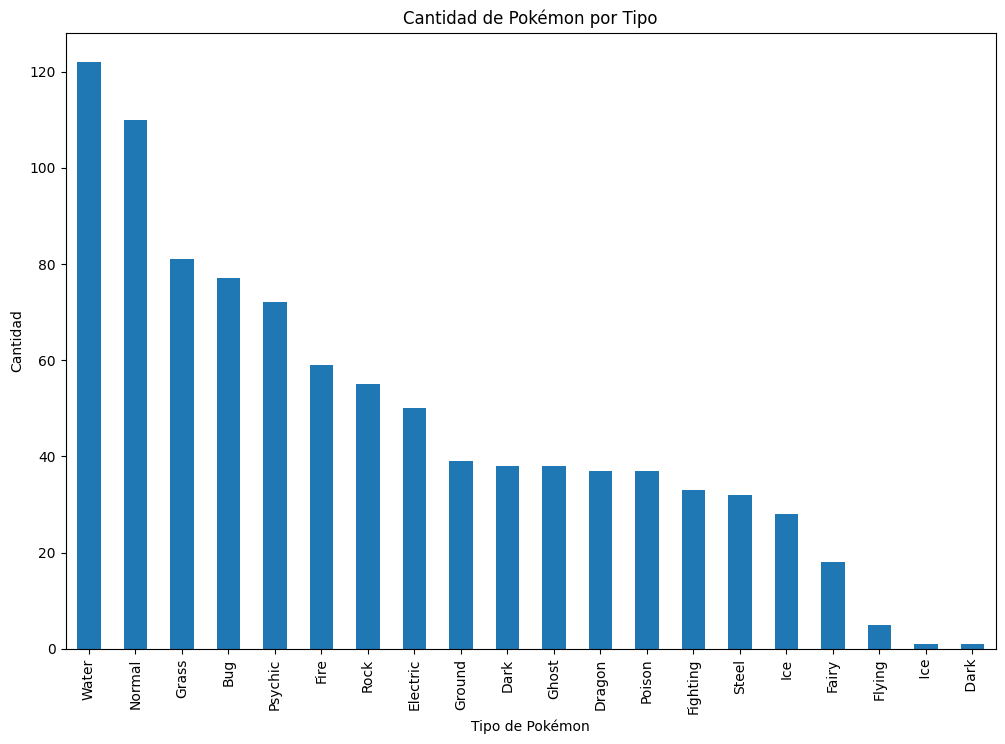

In [ ]:
# Y veamos los datos
plt.figure(figsize=(12, 8))
type1_cuenta.plot(kind='bar')
plt.title('Cantidad de Pokémon por Tipo')
plt.xlabel('Tipo de Pokémon')
plt.ylabel('Cantidad')
plt.show()

Como podemos ver, los valores varían bastante dependiendo del tipo de pokemon.

*Filtremos un poquito mas...*

In [ ]:
#Separamos a los tipo 'Fire' y los tipo 'Grass'
fire_pokemon = pokemon[pokemon['type 1'] == 'Fire']
grass_pokemon = pokemon[pokemon['type 1'] == 'Grass']

In [ ]:
#Obtenemos el valor de el 'attack'
fire_attack = fire_pokemon['attack']
grass_attack = grass_pokemon['attack']

#Y los sumamos
total_attack_fire = fire_attack.sum()
total_attack_grass = grass_attack.sum()
print('Ataque de los tipo fuego')
print (total_attack_fire)
print ('--------')
print('Ataque de los tipo grass')
print (total_attack_grass)

Ataque de los tipo fuego
5028
--------
Ataque de los tipo grass
6006


Epa... Ahora, dibujemos.

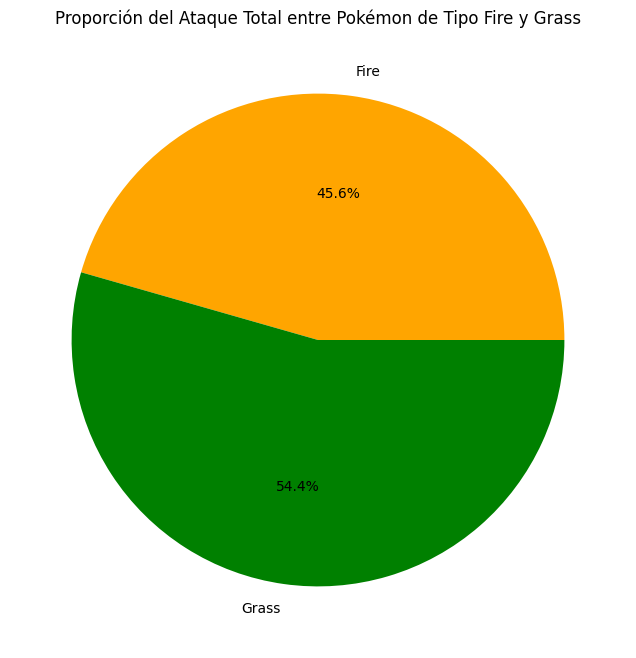

In [ ]:
labels = 'Fire', 'Grass'
sizes = [total_attack_fire, total_attack_grass]
colors = ['orange', 'green']
explode = (0.1, 0)  # solo "explota" el primer segmento

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Proporción del Ataque Total entre Pokémon de Tipo Fire y Grass')
plt.show()

Como podemos ver, los pokemones tipo Grass tienen un 4,4% más de ataque que los de tipo Fire, sumando los ataques de todos los de su tipo.

Veamos el dato con otro gráfico para ver la distribución.

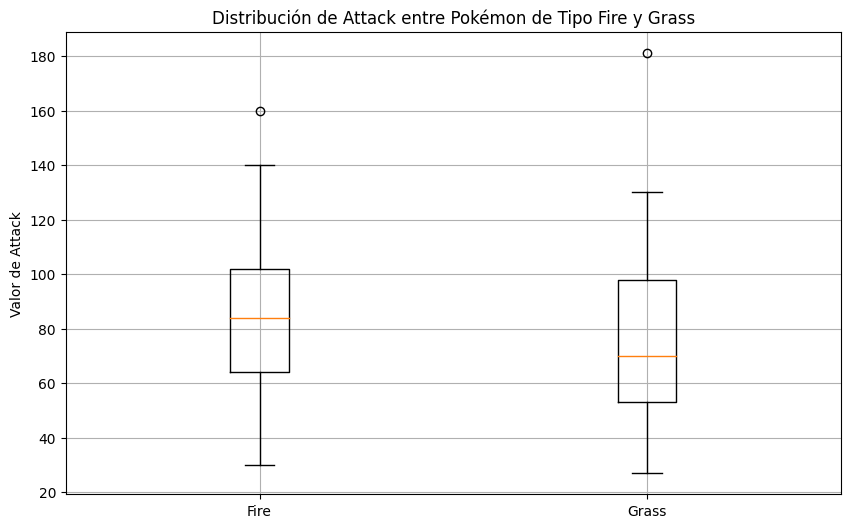

In [ ]:
plt.figure(figsize=(10, 6))
data = [fire_attack, grass_attack]
plt.boxplot(data, labels=['Fire', 'Grass'])
plt.title('Distribución de Attack entre Pokémon de Tipo Fire y Grass')
plt.ylabel('Valor de Attack')
plt.grid(True)
plt.show()


Acá podemos ver que, en lo que respecta de la mediana de los tipo Grass, está un poco mas abajo que la de los tipo Fire, por mas de que la caja es mas grande para el tipo Grass.

Esto significa que la mediana de ataque para el tipo Fire es mas elevada que los del tipo Grass.

Vemos que el Outlier del tipo Grass es mayor por 20 puntos, y eso puede representar un solo pokemon (un solo valor), que solo por curiosidad, veamos cuál es:

In [ ]:
#Separamos el dato de ataque
max_fire_attack = fire_pokemon['attack'].max()
max_grass_attack = grass_pokemon['attack'].max()

# Y obtenemos el pokemon
max_fire_pokemon = fire_pokemon[fire_pokemon['attack'] == max_fire_attack]
max_grass_pokemon = grass_pokemon[grass_pokemon['attack'] == max_grass_attack]

print('El Pokémon de tipo Fire con mayor valor de Attack es:')
print(max_fire_pokemon[['name', 'attack']])
print('--------')
print('El Pokémon de tipo Grass con mayor valor de Attack es:')
print(max_grass_pokemon[['name', 'attack']])

El Pokémon de tipo Fire con mayor valor de Attack es:
              name  attack
302  Mega Blaziken     160
--------
El Pokémon de tipo Grass con mayor valor de Attack es:
        name  attack
917  Kartana     181


In [ ]:
#Veamos el segundo puesto del tipo Grass
second_max_grass_attack = grass_pokemon[grass_pokemon['attack'] < max_grass_attack]['attack'].max()
second_max_grass_pokemon = grass_pokemon[grass_pokemon['attack'] == second_max_grass_attack]
second_max_fire_attack = fire_pokemon[fire_pokemon['attack'] < max_fire_attack]['attack'].max()
second_max_fire_pokemon = fire_pokemon[fire_pokemon['attack'] == second_max_fire_attack]
print('El Pokémon de tipo Fire con el segundo mayor valor de Attack es:')
print(second_max_fire_pokemon[['name', 'attack']])
print('--------')
print('El Pokémon de tipo Grass con el segundo mayor valor de Attack es:')
print(second_max_grass_pokemon[['name', 'attack']])


El Pokémon de tipo Fire con el segundo mayor valor de Attack es:
                         name  attack
641  Darmanitan Standard Mode     140
--------
El Pokémon de tipo Grass con el segundo mayor valor de Attack es:
          name  attack
335    Breloom     130
904  Tapu-Bulu     130


Lo que podemos leer de los datos expuestos es que la primera teoría **no está respaldada por los factos.**

 Si bien el outlier del tipo Grass es mayor por 20 puntos de ataque, representa solamente *un valor*, pero que la mayoría de los de tipo Fire tienen mas ataque que los tipo Grass.

 Vamos a ver el HP:

In [ ]:
#Separemos el dato
fire_hp = fire_pokemon['hp']
grass_hp = grass_pokemon['hp']

#Sumamos
total_hp_fire = fire_hp.sum()
total_hp_grass = grass_hp.sum()
print('HP de los tipo fuego')
print (total_hp_fire)
print ('--------')
print('HP de los tipo grass')
print (total_hp_grass)

HP de los tipo fuego
4098
--------
HP de los tipo grass
5373


Y veamos el gráfico.

<ipython-input-17-7db60cd9d5f0>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type', y='HP', data=hp_data, palette=['orange', 'green'])


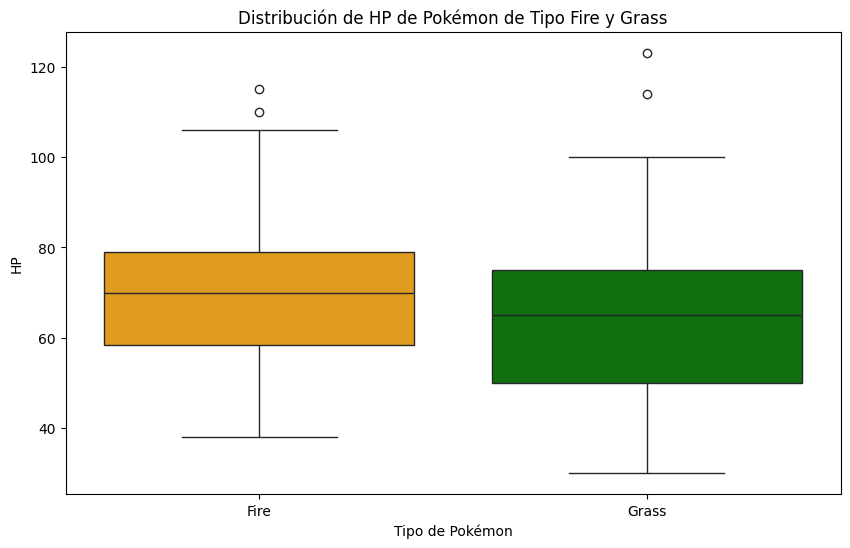

In [ ]:
# Añadir una columna de tipo
fire_hp = pd.DataFrame({'HP': fire_hp, 'Type': 'Fire'})
grass_hp = pd.DataFrame({'HP': grass_hp, 'Type': 'Grass'})

# Concatenar los DataFrames
hp_data = pd.concat([fire_hp, grass_hp])

# Gráfico de caja con Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='HP', data=hp_data, palette=['orange', 'green'])
plt.title('Distribución de HP de Pokémon de Tipo Fire y Grass')
plt.ylabel('HP')
plt.xlabel('Tipo de Pokémon')
plt.show()

Veamos si ocurre lo mismo que en el attack.

In [ ]:
#Separamos el dato de ataque
max_fire_hp = fire_pokemon['hp'].max()
max_grass_hp = grass_pokemon['hp'].max()

# Y obtenemos el pokemon
max_hp_fire = fire_pokemon[fire_pokemon['hp'] == max_fire_hp]
max_hp_grass = grass_pokemon[grass_pokemon['hp'] == max_grass_hp]

print('El Pokémon de tipo Fire con mayor valor de HP es:')
print(max_hp_fire[['name', 'hp']])
print('--------')
print('El Pokémon de tipo Grass con mayor valor de HP es:')
print(max_hp_grass[['name', 'hp']])

El Pokémon de tipo Fire con mayor valor de HP es:
      name   hp
286  Entei  115
--------
El Pokémon de tipo Grass con mayor valor de HP es:
       name   hp
771  Gogoat  123


In [ ]:
#Y ahora el segundo puesto
second_max_grass_hp = grass_pokemon[grass_pokemon['hp'] < max_grass_hp]['hp'].max()
second_max_grass_pokemon = grass_pokemon[grass_pokemon['hp'] == second_max_grass_hp]
second_max_fire_hp = fire_pokemon[fire_pokemon['hp'] < max_fire_hp]['hp'].max()
second_max_fire_pokemon = fire_pokemon[fire_pokemon['hp'] == second_max_fire_hp]
print('El Pokémon de tipo Fire con el segundo mayor valor de HP es:')
print(second_max_fire_pokemon[['name', 'hp']])
print('--------')
print('El Pokémon de tipo Grass con el segundo mayor valor de HP es:')
print(second_max_grass_pokemon[['name', 'hp']])

El Pokémon de tipo Fire con el segundo mayor valor de HP es:
       name   hp
584  Emboar  110
--------
El Pokémon de tipo Grass con el segundo mayor valor de HP es:
          name   hp
681  Amoonguss  114


Por lo que nos dicen los datos, podemos ver que los últimos dos en las listas, tiende a haber una inclinación hacia los tipo Grass en cuanto a cantidad de HP, sin embargo la mediana de estos demuestra lo contrario. Es poca la diferencia del promedio mayor por parte de los tipo Fire.

Lo que singifica que la segunda teoría **no está respaldada por los factos.**



---



# **Utilicemos un algoritmo supervisado para explorar la siguiente hipótesis:**

**Hipótesis:** "El tipo y las estadísticas de un Pokémon pueden predecir su generación."

Esta hipótesis sugiere que las características del Pokémon (como Type 1, Type 2, Ataque, Vida, Defensa, etc.) tienen una relación significativa con la generación a la que pertenece (Generation).

**Objetivo:**
El objetivo es entrenar un modelo de clasificación que utilice las características de los Pokémon para predecir su generación.

*Exploremos los datos.*

In [ ]:
print(pokemon.head())

     #           name type 1  type 2  total  hp  attack  defense  sp_atk  \
0  1.0      Bulbasaur  Grass  Poison    318  45      49       49      65   
1  2.0        Ivysaur  Grass  Poison    405  60      62       63      80   
2  3.0       Venusaur  Grass  Poison    525  80      82       83     100   
3  3.1  Mega Venusaur  Grass  Poison    625  80     100      123     122   
4  4.0     Charmander   Fire     NaN    309  39      52       43      60   

   sp_def  speed   ability1     ability2 ability3  generation legenday  \
0      65     45   Overgrow  Chlorophyll      NaN           1    FALSE   
1      80     60   Overgrow  Chlorophyll      NaN           1    FALSE   
2     100     80   Overgrow  Chlorophyll      NaN           1    FALSE   
3     120     80  Thick Fat          NaN      NaN           1    FALSE   
4      50     65      Blaze  Solar Power      NaN           1    FALSE   

   mythical  
0     False  
1     False  
2     False  
3     False  
4     False  


Hay muchos datos que, para lo que vamos a analizar, no son tan importantes.

**Decisión:** Borrar datos irrelevantes para el caso.

In [ ]:
columnas_borrar = [ 'name', '#', 'ability1', 'ability2', 'ability3', 'mythical', 'legenday']
pokemon = pokemon.drop(columns=columnas_borrar)
pokemon.head()

,type 1,type 2,total,hp,attack,defense,sp_atk,sp_def,speed,generation
0,Grass,Poison,318,45,49,49,65,65,45,1
1,Grass,Poison,405,60,62,63,80,80,60,1
2,Grass,Poison,525,80,82,83,100,100,80,1
3,Grass,Poison,625,80,100,123,122,120,80,1
4,Fire,NaN,309,39,52,43,60,50,65,1


Mucho mejor, sigamos.

In [ ]:
#Importamos la libreria
from sklearn.metrics import classification_report, accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Separamos variables predictoras y variable objetivo
X = pokemon.drop('generation', axis=1)
X = pd.get_dummies(X)
y = pokemon['generation']

# Dividimos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Crear y entrenar el modelo de Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)


Testeamos


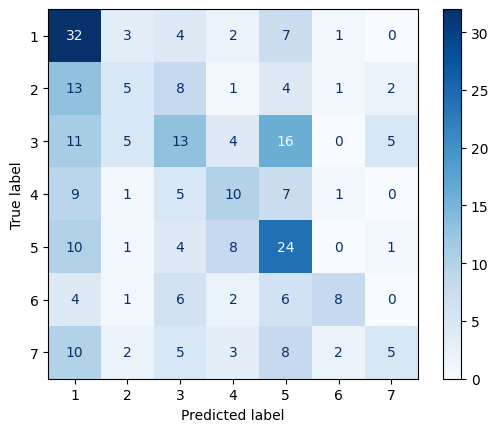

In [ ]:
# Create confusion matrix and display it
cm = confusion_matrix(y_test, y_pred)
# Get unique class labels from y_test
unique_labels = np.unique(y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
disp.plot(cmap='Blues')
plt.show()

In [ ]:
confusion = metrics.confusion_matrix(y_test, y_pred)
confusion.ravel()

array([32,  3,  4,  2,  7,  1,  0, 13,  5,  8,  1,  4,  1,  2, 11,  5, 13,
        4, 16,  0,  5,  9,  1,  5, 10,  7,  1,  0, 10,  1,  4,  8, 24,  0,
        1,  4,  1,  6,  2,  6,  8,  0, 10,  2,  5,  3,  8,  2,  5])

In [ ]:
# Evaluar el modelo
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           1       0.36      0.65      0.46        49
           2       0.28      0.15      0.19        34
           3       0.29      0.24      0.26        54
           4       0.33      0.30      0.32        33
           5       0.33      0.50      0.40        48
           6       0.62      0.30      0.40        27
           7       0.38      0.14      0.21        35

    accuracy                           0.35       280
   macro avg       0.37      0.33      0.32       280
weighted avg       0.36      0.35      0.33       280

Accuracy Score:
0.3464285714285714


Por lo que podemos observar, el algoritmo tiene un **Accuracy** del **0.3**. Lo cual deja asentado que este algoritmo especificamente no está siendo preciso en las predicciones que se le planteó.

Considerando la cantidad de datos que contiene mi Data set, lo más probable es que este caso refiera a un *Overfitting*, y requiera un dataset con mayor cantidad de datos.

No me voy a quedar con la duda, así que voy a intentarlo con el conjunto de entranmiento para saber si avanzar o buscar otros modelos.

In [ ]:
# Predecir en el conjunto de entrenamiento
y_predi = model.predict(X_train)

# Evaluar el modelo
print("Classification Report:")
print(classification_report(y_train, y_predi))

print("Accuracy Score:")
print(accuracy_score(y_train, y_predi))

Classification Report:
              precision    recall  f1-score   support

           1       0.99      1.00      1.00       139
           2       1.00      0.99      0.99        73
           3       1.00      1.00      1.00       108
           4       1.00      1.00      1.00        88
           5       1.00      1.00      1.00       122
           6       1.00      1.00      1.00        57
           7       1.00      1.00      1.00        66

    accuracy                           1.00       653
   macro avg       1.00      1.00      1.00       653
weighted avg       1.00      1.00      1.00       653

Accuracy Score:
0.998468606431853


Definitivamente, en este caso, necesito mas datos los cuales analizar para que este modelo sea preciso.

*Voy a intentar con otro modelo.*

In [ ]:
from sklearn.svm import SVC
# Crear una instancia del modelo SVM
svm_model = SVC(kernel='linear', C=1.0, random_state=0)
# Entrenar el modelo SVM
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred_svm = svm_model.predict(X_test)
# Mostrar el Classification Report y Accuracy Score
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred_svm))

Classification Report:
              precision    recall  f1-score   support

           1       0.28      0.57      0.38        49
           2       0.28      0.15      0.19        34
           3       0.26      0.20      0.23        54
           4       0.15      0.09      0.11        33
           5       0.26      0.42      0.32        48
           6       0.47      0.30      0.36        27
           7       0.29      0.06      0.10        35

    accuracy                           0.28       280
   macro avg       0.28      0.25      0.24       280
weighted avg       0.28      0.28      0.25       280

Accuracy Score:
0.275


El nivel de precisión sigue siendo **muy bajo.**

# **CONCLUSIÓN:**

**La prueba de la hipótesis no pudo ser concretada por falta de datos.**



**Preguntas personales acerca dell proyecto:**
Para este tipo de problemas ¿está bien el algoritmo que utilicé?

Tengo presente que el dataset no era óptimo para un análisis de datos mas extenso y preciso, pero simplificaba las cosas para una entrega óptima. En el curso II, utilizaré un dataset orientado a empresas, volveré a hacer todo este análisis de datos para mejorar la propuesta.